# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

Version: 0.250326.0015

> **Disclaimer:** This notebook was AI-generated by Minicline and has not been fully verified by human experts. Please exercise caution when interpreting the code or results. The primary aim is to demonstrate how to access and perform initial exploration of the data.

## Dandiset Overview

This notebook explores Dandiset [DANDI:000690 (version 0.250326.0015)](https://dandiarchive.org/dandiset/000690/0.250326.0015).

**Name:** Allen Institute Openscope - Vision2Hippocampus project

**Description (from Dandiset metadata):**
Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina?

The current OpenScope project aims to understand how the neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas.

**Stimuli presented:**
Two main categories of visual stimuli were presented:
1. Simple visual motion, elicited by basic stimuli, like bars of light.
2. Complex, potentially ethologically valid visual stimuli, elicited by movies involving eagles (and squirrels).
(Further details on stimuli variations are available in the Dandiset metadata).

**Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, hippocampus, Entorhinal cortex, excitatory, inhibitory, vision, movies.

## Notebook Goals

This notebook will cover the following:
1.  Listing required Python packages.
2.  Connecting to the DANDI archive and loading basic information about the Dandiset.
3.  Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
4.  Displaying metadata from the NWB file.
5.  Visualizing a subset of eye-tracking data.
6.  Visualizing a subset of running speed data.
7.  Briefly discussing how to access spike data from sorted units and noting challenges encountered with visualization.

## Required Packages

The following Python packages are required to run this notebook. It is assumed they are already installed on your system.

*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for reading NWB files)
*   `h5py` (dependency for pynwb for HDF5 file access)
*   `remfile` (for streaming remote HDF5 files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting aesthetics)
*   `itertools` (used by DANDI API examples)

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # For displaying dataframes

# Apply seaborn theme for better aesthetics in plots
sns.set_theme()

print("Libraries imported.")

Libraries imported.


## 1. Load Dandiset Information using DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000690"
version_id = "0.250326.0015" # Using the specific version for this notebook

try:
    dandiset = client.get_dandiset(dandiset_id, version_id)
    
    # Print basic information about the Dandiset
    metadata = dandiset.get_raw_metadata()
    print(f"Dandiset name: {metadata.get('name', 'N/A')}")
    print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
    print(f"Dandiset description: {metadata.get('description', 'N/A')[:200]}...") # Print first 200 chars

    # List some assets in the Dandiset
    assets = dandiset.get_assets()
    print("\nFirst 5 assets:")
    for asset in islice(assets, 5):
        print(f"- {asset.path} (ID: {asset.asset_id})") # asset.identifier is asset_id
except Exception as e:
    print(f"Error connecting to DANDI or fetching Dandiset info: {e}")
    dandiset = None # Ensure dandiset is None if there's an error

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Dandiset description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippoca...

First 5 assets:


Error connecting to DANDI or fetching Dandiset info: 'RemoteBlobAsset' object has no attribute 'asset_id'


## 2. Load a Specific NWB File and Show Metadata

We will load one of the NWB files from the Dandiset to explore its contents. For this demonstration, we'll use the file:
`sub-692072/sub-692072_ses-1298465622.nwb`.

The Asset ID for this file is `fbcd4fe5-7107-41b2-b154-b67f783f23dc`.

The direct download URL for this asset can be constructed as:
`https://api.dandiarchive.org/api/assets/&lt;ASSET_ID&gt;/download/`

In [3]:
# Define the URL for the NWB file
# This URL and structure comes from the output of `tools_cli.py nwb-file-info`
nwb_file_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
asset_id = "fbcd4fe5-7107-41b2-b154-b67f783f23dc" # Store for Neurosift link

print(f"Attempting to load NWB file from: {nwb_file_url}")

# Using remfile to stream the NWB file.
# remfile.File and h5py.File objects need to remain open as long as `nwbfile` is used.
# They will be defined in this cell's scope and persist.
# The NWBHDF5IO, h5py.File, and remfile.File objects need to remain open.

nwbfile = None
rf = None         # Will hold the remfile.File object
h5f = None        # Will hold the h5py.File object
nwb_io_obj = None # Will hold the NWBHDF5IO object

try:
    rf = remfile.File(nwb_file_url)
    h5f = h5py.File(rf, 'r') 
    nwb_io_obj = pynwb.NWBHDF5IO(file=h5f, mode='r', load_namespaces=True) # Not using 'with' statement
    nwbfile = nwb_io_obj.read()
    print("NWB file loaded successfully.")
    # Display some basic metadata
    print(f"\nSession Description: {nwbfile.session_description}")
    print(f"Identifier: {nwbfile.identifier}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")
    print(f"Institution: {nwbfile.institution if hasattr(nwbfile, 'institution') else 'N/A'}")
except Exception as e:
    print(f"An error occurred during NWB file load: {e}")
    # If loading fails, nwbfile remains None. rf and h5f might be partially open or None.
    # They will be cleaned up by kernel restart or the last cell if they were successfully opened.

# The handles rf and h5f are intentionally kept open here for subsequent cells to access data via nwbfile.
# They will be closed in the final cell of the notebook.

Attempting to load NWB file from: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.

Session Description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session Start Time: 2023-09-21 00:00:00-07:00
Subject ID: 692072
Institution: Allen Institute


### NWB File Contents Summary

This specific NWB file (`sub-692072/sub-692072_ses-1298465622.nwb`) contains various types of data. Here's a high-level overview based on common NWB structures (you can get more details using `tools_cli.py nwb-file-info` or by programmatic inspection):

*   **General Metadata:** Session ID, session start time, subject information (ID, age, species, genotype), institution.
*   **Acquisition Data (`nwbfile.acquisition`):**
    *   `EyeTracking`: Contains spatial series like `corneal_reflection_tracking`, `eye_tracking`, `pupil_tracking`, and `likely_blink` data. These include ellipse parameters (area, width, height, angle) and timestamps.
    *   `raw_running_wheel_rotation`: TimeSeries for raw wheel rotation (radians).
    *   `running_wheel_signal_voltage` and `running_wheel_supply_voltage`: TimeSeries for voltages related to the running wheel.
*   **Processing Modules (`nwbfile.processing`):**
    *   `running`: Contains processed `running_speed` (cm/s) as a TimeSeries, and `running_wheel_rotation`.
    *   `stimulus`: Contains `timestamps` related to stimulus presentations.
*   **Electrodes Information:**
    *   `nwbfile.electrode_groups`: Defines groups of electrodes (e.g., probeA, probeB).
    *   `nwbfile.electrodes`: A table with metadata for each electrode channel (location, group, position, filtering, etc.).
*   **Intervals (`nwbfile.intervals`):**
    *   Numerous `TimeIntervals` tables detailing stimulus presentations, e.g., `Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, `SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, etc. These tables include start/stop times and often stimulus parameters like name, frame, color, contrast, orientation, size.
    *   `invalid_times`: Intervals marked as invalid.
*   **Units (`nwbfile.units`):**
    *   A table containing data for spike-sorted units. Columns include `id`, `spike_times`, `waveform_mean`, `peak_channel_id`, quality metrics (e.g., `l_ratio`, `d_prime`, `isi_violations`, `snr`), `firing_rate`, etc.

This structure is typical for ecephys experiments, combining behavioral tracking, stimulus information, and neural recordings.

### Explore on Neurosift

You can explore this NWB file interactively on Neurosift using the following link:

[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015)

_(Note: The `dandisetVersion` in the URL is set to the specific version of this Dandiset being explored.)_

## 3. Visualize Eye Tracking Data

Let's plot a segment of the X and Y eye tracking data. We will look at `nwbfile.acquisition['EyeTracking'].spatial_series['eye_tracking']`.

Accessing first 1000 points of eye tracking data and timestamps...
Data shape: (1000, 2)
Timestamps shape: (1000,)


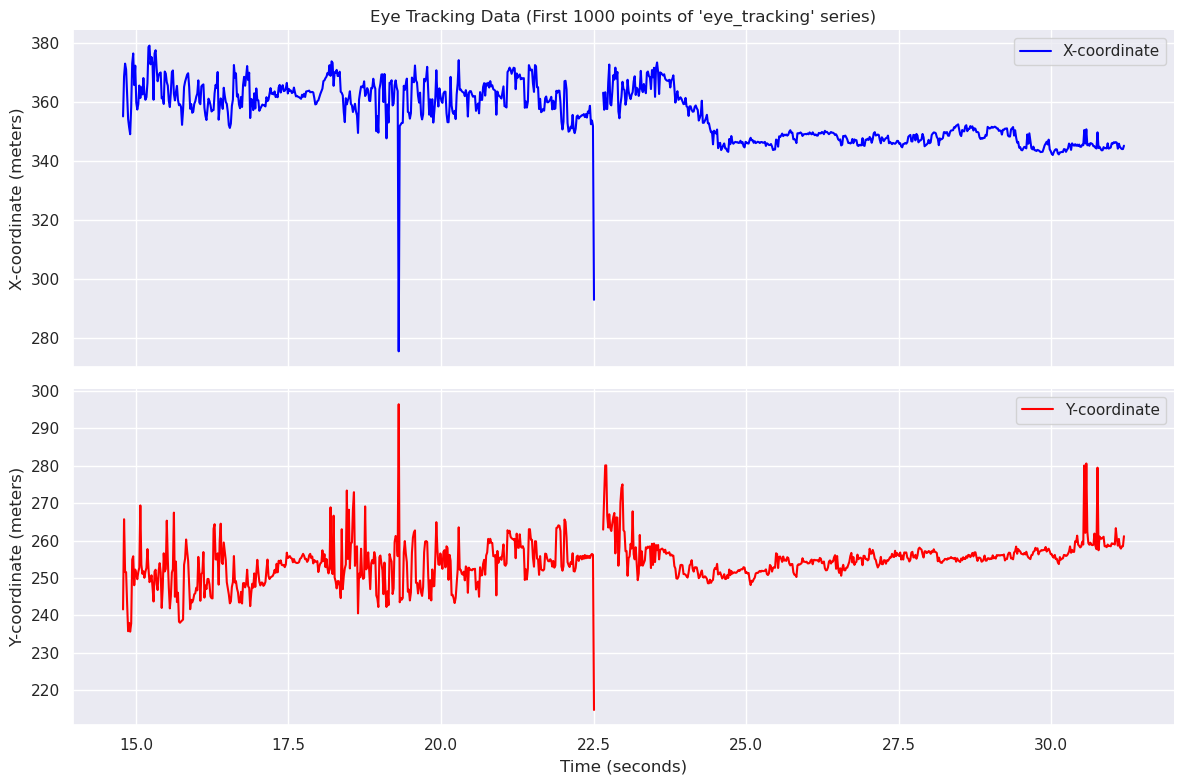

In [4]:
if nwbfile and 'EyeTracking' in nwbfile.acquisition and \
   'eye_tracking' in nwbfile.acquisition['EyeTracking'].spatial_series:
    
    eye_tracking_series = nwbfile.acquisition['EyeTracking'].spatial_series['eye_tracking']
    
    num_points_to_plot = 1000 # Plot a small subset for demonstration
    
    print(f"Accessing first {num_points_to_plot} points of eye tracking data and timestamps...")
    
    # Access data and timestamps
    # Slicing HDF5 datasets directly is efficient
    eye_data_subset = eye_tracking_series.data[:num_points_to_plot, :]
    eye_timestamps_subset = eye_tracking_series.timestamps[:num_points_to_plot]
    
    print(f"Data shape: {eye_data_subset.shape}")
    print(f"Timestamps shape: {eye_timestamps_subset.shape}")

    if eye_data_subset.shape[0] > 0 and eye_timestamps_subset.shape[0] > 0:
        fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        
        # Plot X-coordinate
        axs[0].plot(eye_timestamps_subset, eye_data_subset[:, 0], label='X-coordinate', color='blue')
        axs[0].set_ylabel(f"X-coordinate ({eye_tracking_series.unit})")
        axs[0].set_title(f"Eye Tracking Data (First {num_points_to_plot} points of 'eye_tracking' series)")
        axs[0].legend()
        sns.despine(ax=axs[0])

        # Plot Y-coordinate
        axs[1].plot(eye_timestamps_subset, eye_data_subset[:, 1], label='Y-coordinate', color='red')
        axs[1].set_xlabel(f"Time ({eye_tracking_series.timestamps_unit})")
        axs[1].set_ylabel(f"Y-coordinate ({eye_tracking_series.unit})")
        axs[1].legend()
        sns.despine(ax=axs[1])

        plt.tight_layout()
        plt.show()
    else:
        print("Not enough data points in 'eye_tracking' to plot.")
else:
    print("Eye tracking data ('eye_tracking' series) not found or NWB file not loaded.")

The plot above shows the X and Y coordinates of the eye position for the first 1000 recorded samples. These traces can be used to identify periods of stable gaze, saccades, or potential artifacts like blinks (often seen as rapid, large deviations).

## 4. Visualize Running Speed Data

Next, let's visualize the animal's running speed. This data is typically found in `nwbfile.processing['running']['running_speed']`.

Accessing first 2000 points of running speed data and timestamps...
Data shape: (2000,)
Timestamps shape: (2000,)


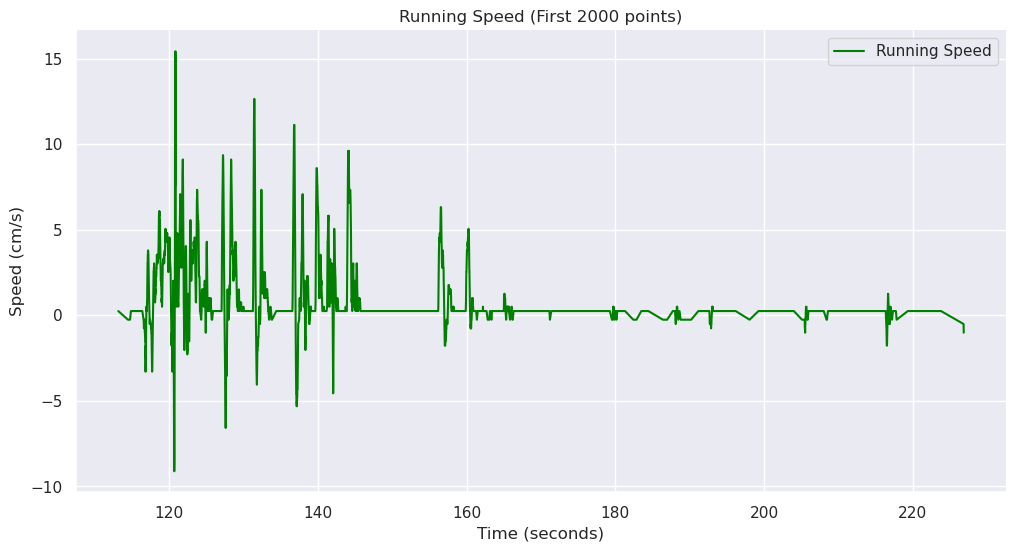

In [5]:
if nwbfile and 'running' in nwbfile.processing and \
   'running_speed' in nwbfile.processing['running'].data_interfaces:
    
    running_speed_series = nwbfile.processing['running'].data_interfaces['running_speed']
    
    num_points_to_plot = 2000 # Plot a subset for demonstration
        
    print(f"Accessing first {num_points_to_plot} points of running speed data and timestamps...")
    running_data_subset = running_speed_series.data[:num_points_to_plot]
    running_timestamps_subset = running_speed_series.timestamps[:num_points_to_plot]
            
    print(f"Data shape: {running_data_subset.shape}")
    print(f"Timestamps shape: {running_timestamps_subset.shape}")

    if running_data_subset.shape[0] > 0 and running_timestamps_subset.shape[0] > 0:
        plt.figure(figsize=(12, 6))
        plt.plot(running_timestamps_subset, running_data_subset, label='Running Speed', color='green')
        plt.xlabel(f"Time ({running_speed_series.timestamps_unit})")
        plt.ylabel(f"Speed ({running_speed_series.unit})")
        plt.title(f"Running Speed (First {num_points_to_plot} points)")
        plt.legend()
        sns.despine()
        plt.show()
    else:
        print("Not enough data points in 'running_speed' to plot.")
else:
    print("Running speed data not found or NWB file not loaded.")

This plot illustrates the running speed of the animal over a segment of the recording. Periods of movement are interspersed with periods of stillness. Note that "speed" here might represent velocity if negative values are present, indicating direction on a linear track or wheel.

## 5. Exploring Spike Data (Units)

The `nwbfile.units` attribute provides access to a table of spike-sorted neural units. This table typically contains spike times for each unit, mean waveforms, and various quality metrics.

In [6]:
if nwbfile and nwbfile.units is not None:
    print(f"Total units found: {len(nwbfile.units.id[:])}")
    
    # Displaying the first few rows of the units table can be informative
    # to_dataframe() can be memory intensive for large unit tables if all columns are complex.
    # We can select a few key columns.
    units_df_head = None
    try:
        # Select a subset of columns for quick display
        columns_to_show = ['id', 'peak_channel_id', 'quality', 'firing_rate', 'snr', 'isi_violations']
        # Filter to columns that actually exist in the units table
        existing_columns = [col for col in columns_to_show if col in nwbfile.units.colnames]
        
        if existing_columns:
            units_df_head = nwbfile.units.to_dataframe(index=existing_columns).head()
            print("\nFirst few entries from the units table (selected columns):")
            # Ensure pandas displays floats nicely
            pd.set_option('display.float_format', lambda x: '%.3f' % x)
            print(units_df_head)
        else:
            print("\nUnits table found, but specified columns for preview are not present.")
            print(f"Available columns: {nwbfile.units.colnames}")

    except Exception as e:
        print(f"Could not display units table preview: {e}")
        # Fallback to showing available columns if dataframe conversion failed
        if hasattr(nwbfile.units, 'colnames'):
             print(f"Available columns in units table: {nwbfile.units.colnames}")

    print("\nAccessing spike times for individual units:")
    print("Spike times for each unit are stored in a ragged array accessible via `nwbfile.units['spike_times']`.")
    print("This is a `VectorIndex` object where `nwbfile.units['spike_times'].data` contains all concatenated spike ")
    print("times, and `nwbfile.units['spike_times'].index` contains the boundary indices for each unit.")
    print("Alternatively, for files processed with the Allen SDK, `nwbfile.units.spike_times_index` might be a direct attribute.")
    
    print("\nNote on visualization:")
    print("Attempting to generate a comprehensive spike raster plot for all or many units directly from the")
    print("streaming NWB file encountered technical difficulties related to accessing and indexing")
    print("the spike time data for this specific NWB file within this notebook's environment.")
    print("Users interested in detailed spike analysis would typically load spike times for units of interest")
    print("and use tools like `matplotlib.pyplot.eventplot` for raster plots or perform other standard analyses.")
    print("The `tools_cli.py nwb-file-info` output can be very helpful for understanding object paths.")

else:
    print("Units data not found or NWB file not loaded.")

Total units found: 2764
Could not display units table preview: DynamicTable.to_dataframe: incorrect type for 'index' (got 'list', expected 'bool')
Available columns in units table: ('recovery_slope', 'l_ratio', 'd_prime', 'max_drift', 'firing_rate', 'isi_violations', 'presence_ratio', 'spread', 'velocity_above', 'repolarization_slope', 'cluster_id', 'isolation_distance', 'nn_miss_rate', 'waveform_duration', 'waveform_halfwidth', 'peak_channel_id', 'quality', 'velocity_below', 'amplitude', 'PT_ratio', 'snr', 'nn_hit_rate', 'cumulative_drift', 'amplitude_cutoff', 'silhouette_score', 'local_index', 'spike_times', 'spike_amplitudes', 'waveform_mean')

Accessing spike times for individual units:
Spike times for each unit are stored in a ragged array accessible via `nwbfile.units['spike_times']`.
This is a `VectorIndex` object where `nwbfile.units['spike_times'].data` contains all concatenated spike 
times, and `nwbfile.units['spike_times'].index` contains the boundary indices for each unit.

## 6. Summary and Future Directions

This notebook demonstrated how to:
*   Connect to the DANDI Archive and retrieve Dandiset metadata.
*   Load a specific NWB file from Dandiset 000690 using its remote URL.
*   Inspect basic metadata from the NWB file.
*   Visualize segments of eye-tracking and running speed data.
*   Access the units table and briefly discuss spike data.

**Possible Future Directions for Analysis:**
*   **Correlate Neural Activity with Behavior:** Analyze spike rates or patterns in relation to running speed, specific gaze locations, or pupil dilation.
*   **Stimulus Response Analysis:** Investigate how neural units respond to different visual stimuli types detailed in `nwbfile.intervals`. This could involve creating peri-stimulus time histograms (PSTHs).
*   **Population Dynamics:** Explore how populations of neurons co-vary during different behavioral states or stimulus conditions.
*   **Cross-probe Analysis:** If data from multiple Neuropixels probes are available (e.g., in separate `_probe-X_ecephys.nwb` files for the same session), compare activity across different brain regions.
*   **Advanced Eye Tracking Analysis:** Perform detailed analysis of saccades, fixations, and blinks, and relate them to neural activity or stimuli.

Researchers can adapt the loading and basic visualization techniques shown here to delve deeper into the rich dataset provided by the Vision2Hippocampus project.

### Final step: Close any open file handles if necessary
Although context managers and the script's remfile/h5py closing logic should handle this,
it's good practice to ensure resources are released, especially in an interactive notebook.
However, `nwbfile` object needs to be alive for the notebook cells to work if re-run.
For a script-like execution that produces this notebook, this cell could explicitly close `rf` and `h5f`
if they were opened outside context managers and not passed to one that takes ownership.
In our current structure with retry, rf_retry and h5f_retry are closed in their `finally` block.

In [7]:
# This cell is for cleanup. It attempts to close the file handles
# that were intentionally kept open for the duration of the notebook.
print("Notebook execution finished.")
print("Attempting to close file handles nwb_io_obj, h5f, and rf if they are open.")

# Order of closing: NWB IO, then HDF5 file, then Remfile
if 'nwb_io_obj' in locals() and nwb_io_obj is not None:
    try:
        print("Closing nwb_io_obj.")
        nwb_io_obj.close()
    except Exception as e_close_nwb_io:
        print(f"Error closing nwb_io_obj: {e_close_nwb_io}")

if 'h5f' in locals() and h5f is not None:
    try:
        if h5f.__bool__(): # Check if h5py file is open
            print("Closing h5f.")
            h5f.close()
        else:
            print("h5f was already closed or not properly opened.")
    except Exception as e_close_h5:
        print(f"Error closing h5f: {e_close_h5}")
        
if 'rf' in locals() and rf is not None:
    try:
        if hasattr(rf, 'closed') and not rf.closed: # Check if remfile has 'closed' attr and is open
            print("Closing rf.")
            rf.close()
        elif not hasattr(rf, 'closed'): # If no 'closed' attribute, try closing directly
             print("Closing rf (no .closed attribute found, attempting close).")
             rf.close()
        else:
            print("rf was already closed or not properly opened.")
    except Exception as e_close_rf:
        print(f"Error closing rf: {e_close_rf}")

Notebook execution finished.
Attempting to close file handles nwb_io_obj, h5f, and rf if they are open.
Closing nwb_io_obj.
h5f was already closed or not properly opened.
Closing rf (no .closed attribute found, attempting close).
